In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import utils
import numpy as np
from sklearn import linear_model
from sklearn import svm
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline

In [97]:

data = pd.read_csv("fibre_properties.csv")
data.head()

,Sr.No,2.5% span length (mm),UR (%),Fineness (ug/inch),Bundle Strength (cN/tex),Trash content (%),Yarn Count (tex)
0,1,28.32,49.6,4.18,22.25,5.32,36.91
1,2,27.98,49.6,3.80,21.84,5.60,36.91
2,3,28.53,48.0,4.50,22.17,6.30,36.91
3,4,29.58,50.0,4.24,22.17,5.38,36.91
4,5,29.20,50.5,4.25,22.27,5.30,36.91


In [98]:
del data["Sr.No"]

In [99]:
pd.set_option('display.max_columns',None)
data.head()


,2.5% span length (mm),UR (%),Fineness (ug/inch),Bundle Strength (cN/tex),Trash content (%),Yarn Count (tex)
0,28.32,49.6,4.18,22.25,5.32,36.91
1,27.98,49.6,3.80,21.84,5.60,36.91
2,28.53,48.0,4.50,22.17,6.30,36.91
3,29.58,50.0,4.24,22.17,5.38,36.91
4,29.20,50.5,4.25,22.27,5.30,36.91


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   2.5% span length (mm)     20 non-null     float64
 1   UR (%)                    20 non-null     float64
 2   Fineness (ug/inch)        20 non-null     float64
 3   Bundle Strength (cN/tex)  20 non-null     float64
 4   Trash content (%)         20 non-null     float64
 5   Yarn Count (tex)          20 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB


In [101]:
data["Yarn Count (tex)"].value_counts()
            

28.80    8
36.91    6
29.53    6
Name: Yarn Count (tex), dtype: int64

In [102]:
data.isnull().sum()

2.5% span length (mm)       0
UR (%)                      0
Fineness (ug/inch)          0
Bundle Strength (cN/tex)    0
Trash content (%)           0
Yarn Count (tex)            0
dtype: int64

In [103]:
data.describe()

,2.5% span length (mm),UR (%),Fineness (ug/inch),Bundle Strength (cN/tex),Trash content (%),Yarn Count (tex)
count,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000
mean,26.890500,48.425000,4.6620,19.158000,8.999000,31.452000
std,1.972688,1.418626,0.6016,3.329488,4.247461,3.679015
min,22.400000,45.500000,3.8000,14.650000,5.300000,28.800000
25%,25.350000,47.875000,4.2250,15.360000,5.510000,28.800000
50%,27.805000,48.400000,4.4700,21.095000,6.015000,29.530000
75%,28.320000,49.600000,5.2875,22.170000,13.952500,36.910000
max,29.580000,50.500000,5.5000,22.270000,14.400000,36.910000


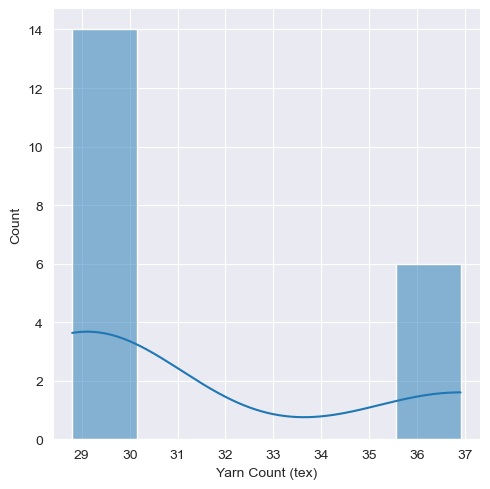

In [104]:
sns.displot(data['Yarn Count (tex)'],kde=True)

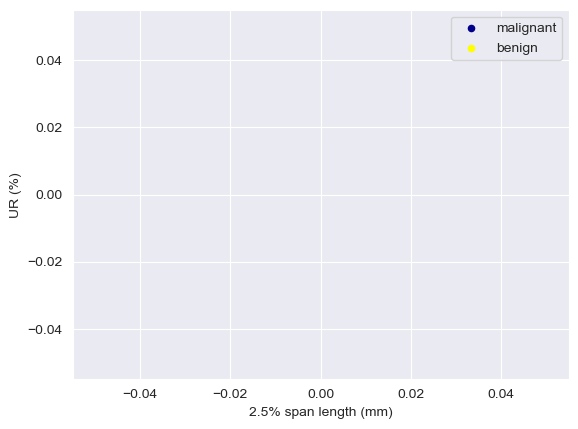

In [105]:
ax = data[data['Yarn Count (tex)'] == 4][0:50].plot(kind='scatter', x='2.5% span length (mm)', y='UR (%)', color='DarkBlue', label='malignant');
data[data['Yarn Count (tex)'] == 2][0:50].plot(kind='scatter', x='2.5% span length (mm)', y='UR (%)', color='Yellow', label='benign', ax=ax);
plt.show()

In [106]:
data

,2.5% span length (mm),UR (%),Fineness (ug/inch),Bundle Strength (cN/tex),Trash content (%),Yarn Count (tex)
0,28.32,49.6,4.18,22.25,5.32,36.91
1,27.98,49.6,3.80,21.84,5.60,36.91
2,28.53,48.0,4.50,22.17,6.30,36.91
3,29.58,50.0,4.24,22.17,5.38,36.91
4,29.20,50.5,4.25,22.27,5.30,36.91
5,27.67,49.0,4.42,21.71,5.73,36.91
6,27.94,48.8,3.90,21.46,5.48,29.53
7,28.32,49.6,4.18,22.25,5.32,29.53
8,27.98,49.6,3.80,21.84,5.60,29.53
9,28.53,48.0,4.50,22.17,6.30,29.53


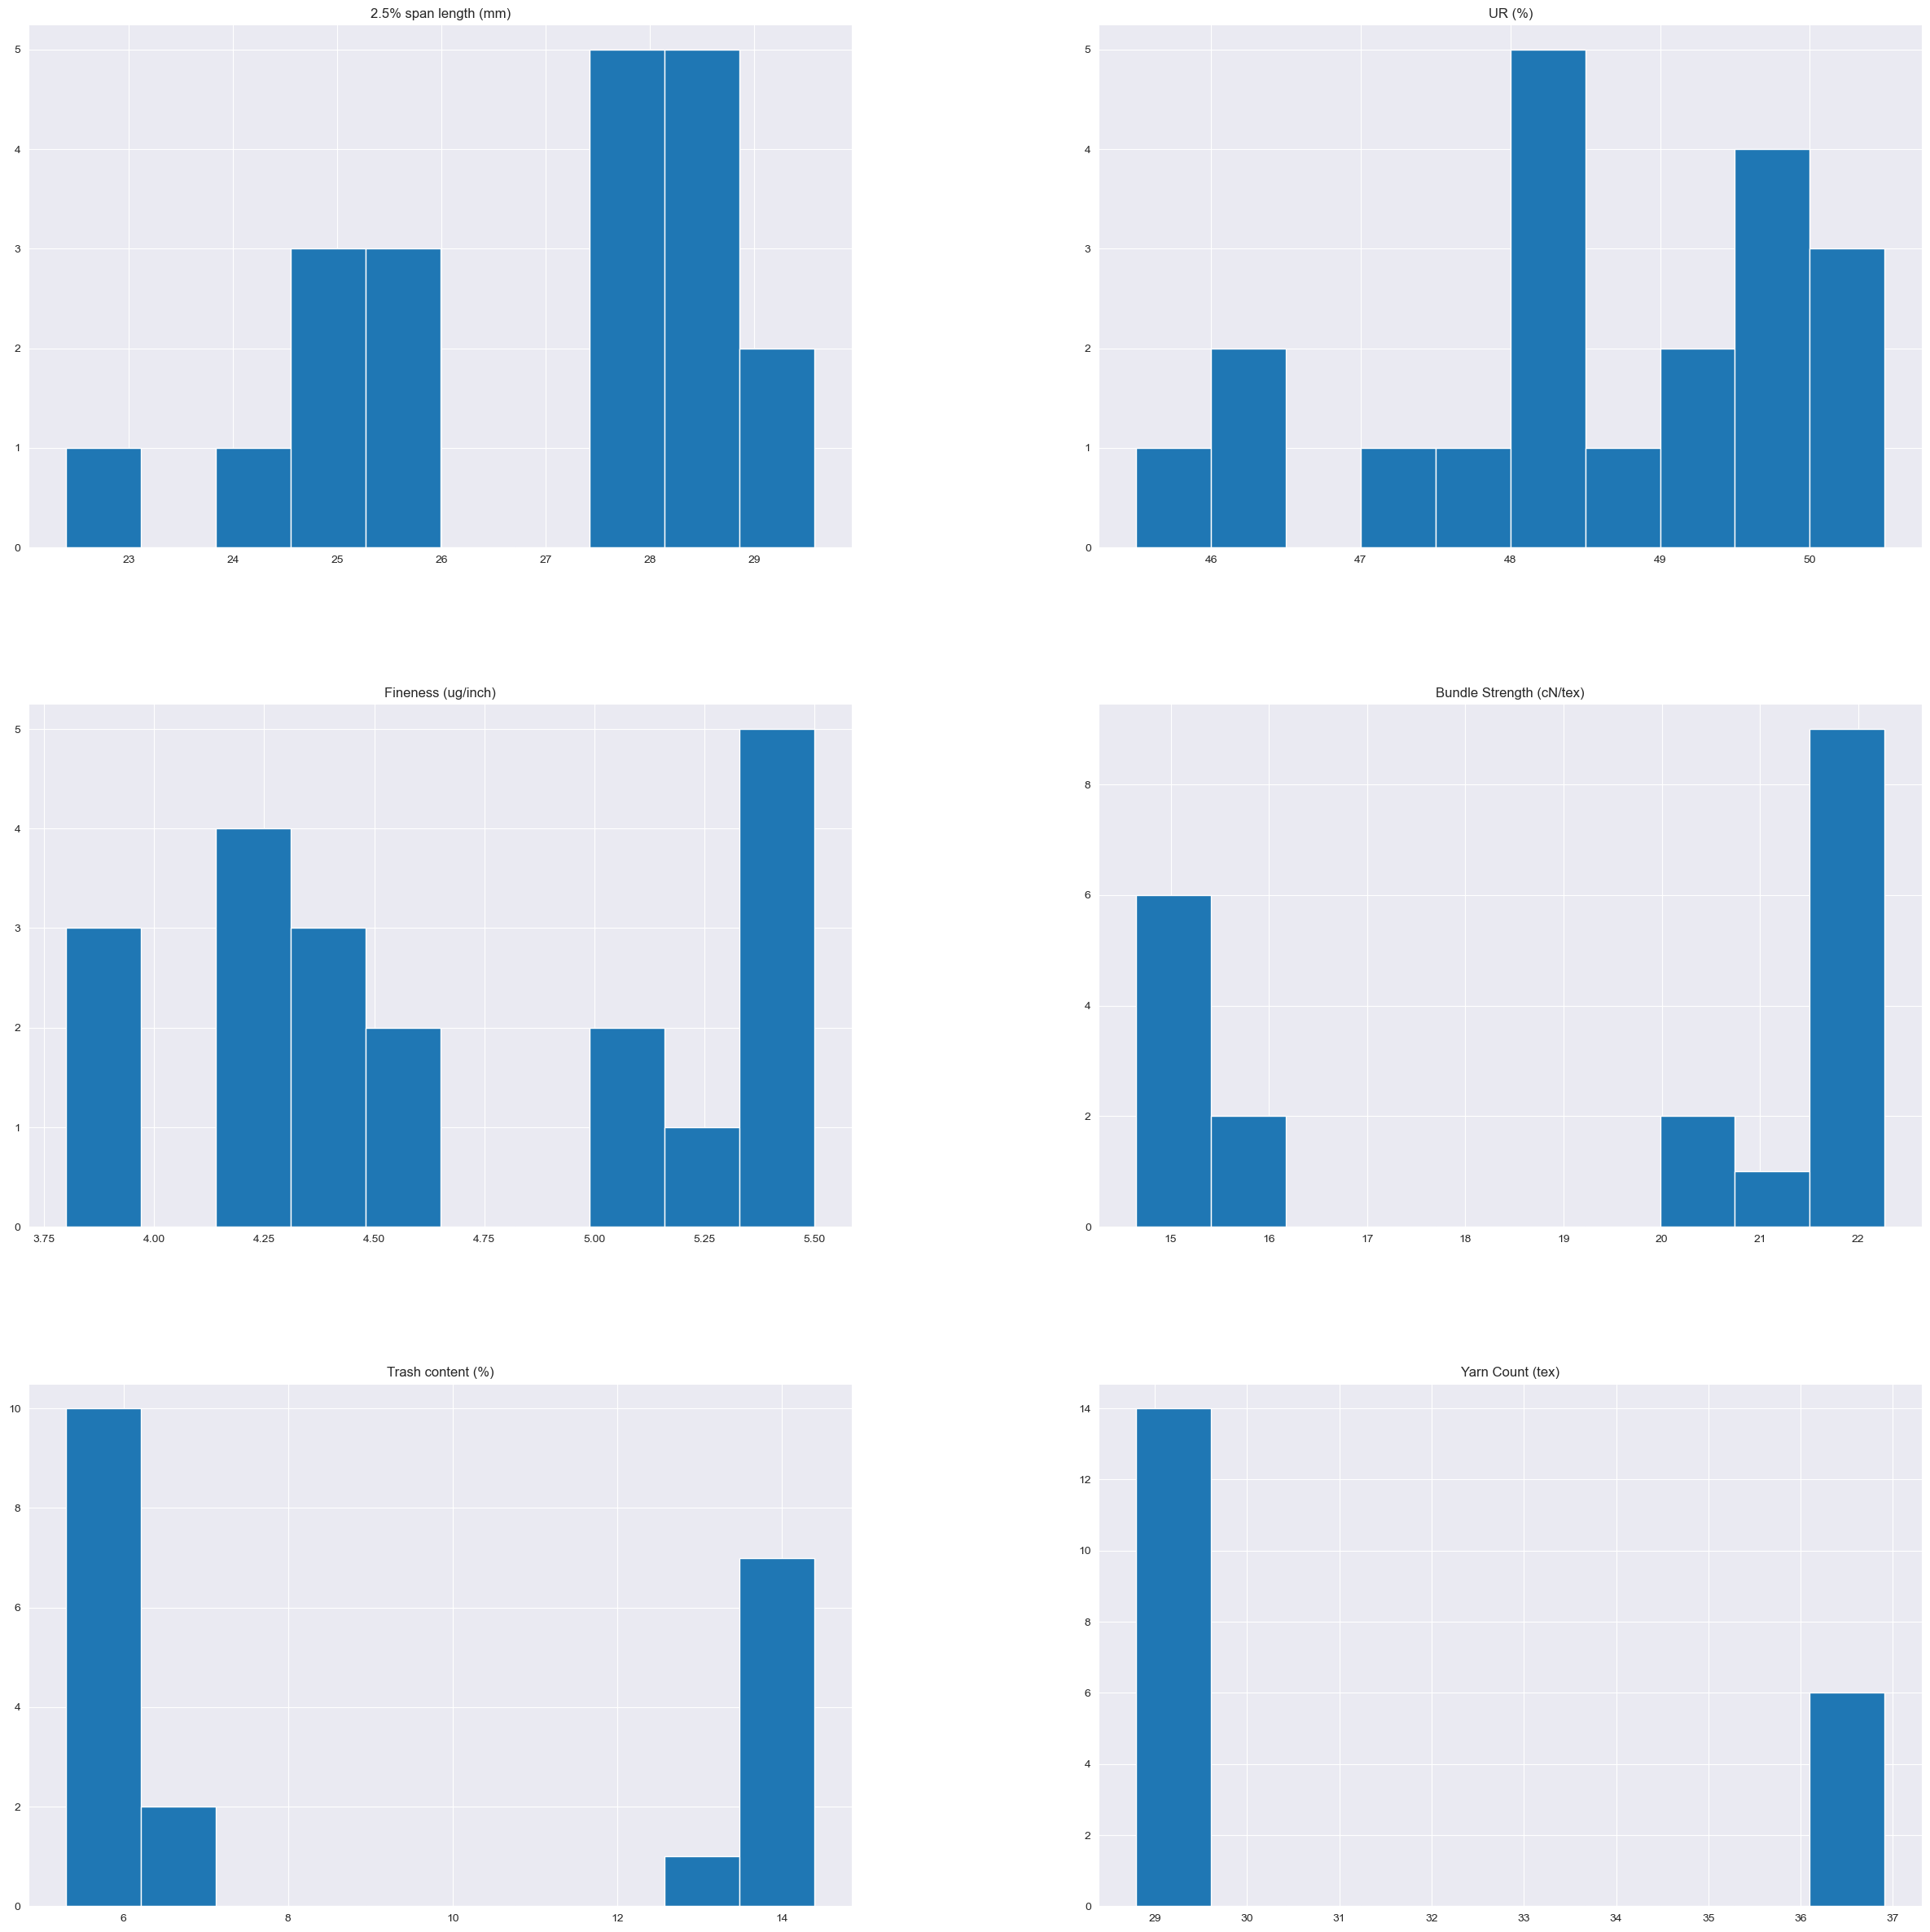

In [107]:
sns.set_style('darkgrid')
data.hist(figsize=(30,30))
plt.show()

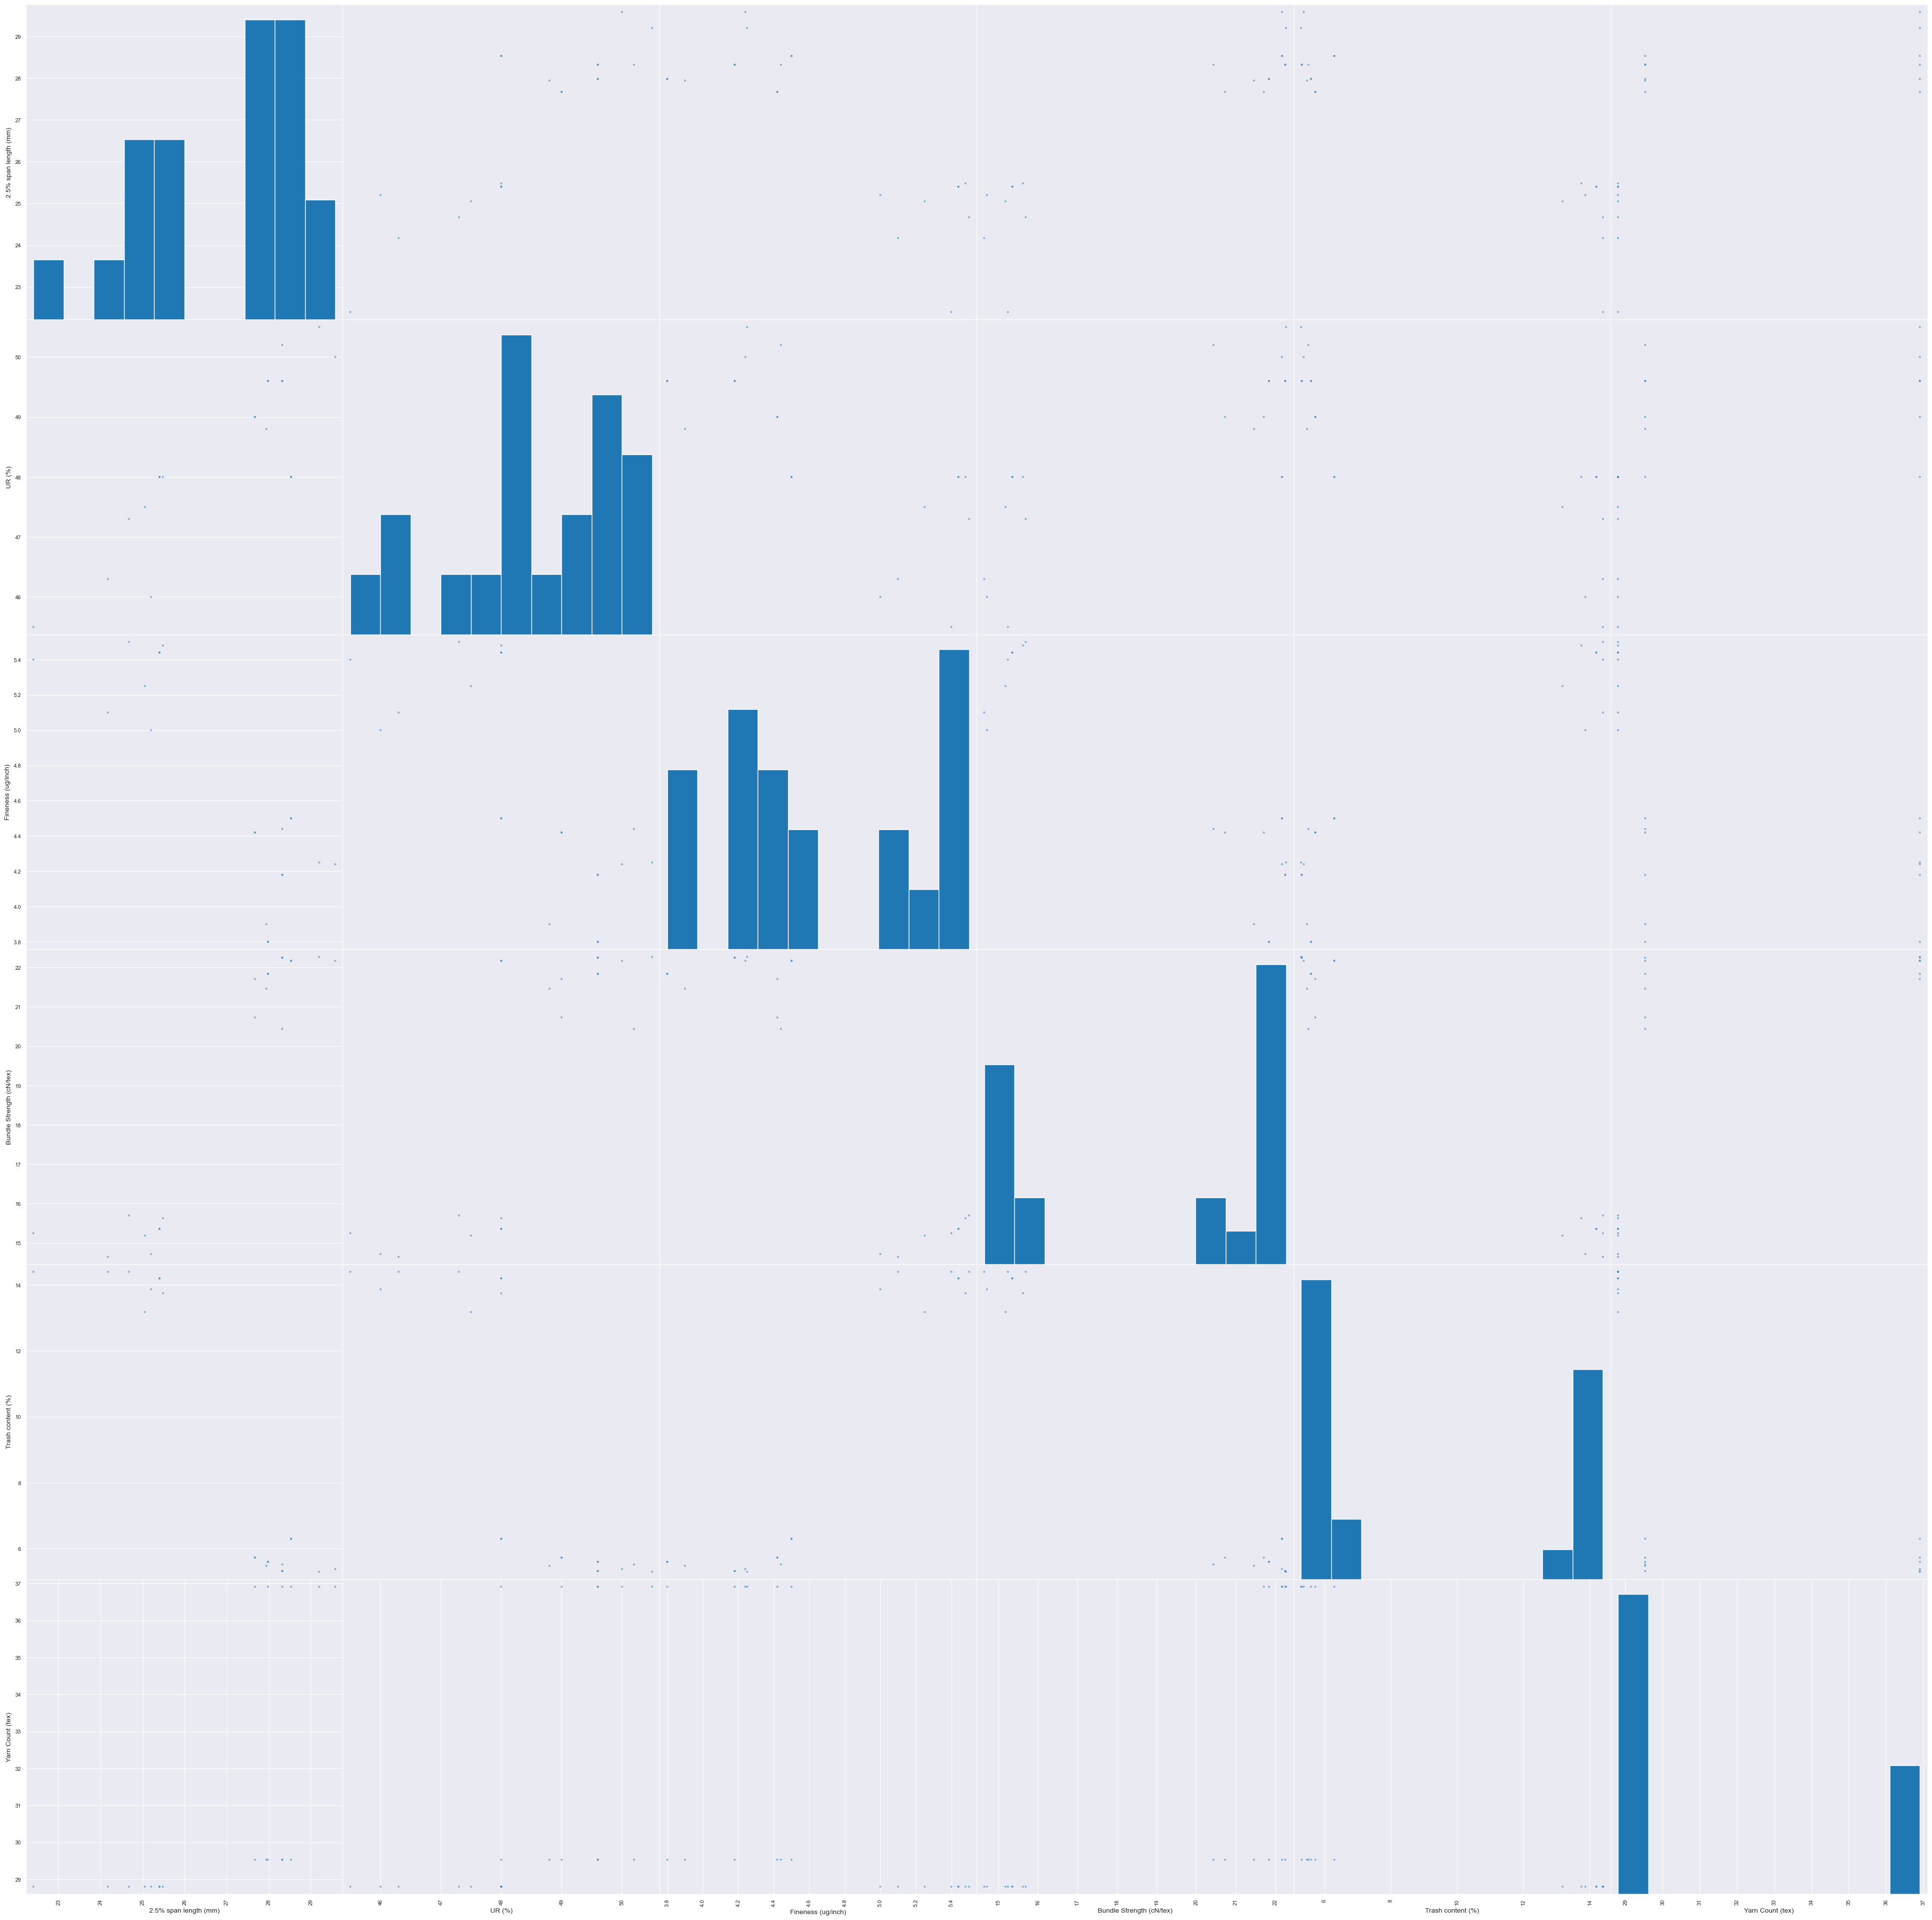

In [108]:
# Create scatter plot matrix
scatter_matrix(data, figsize = (50,50))
plt.show()

<AxesSubplot:>

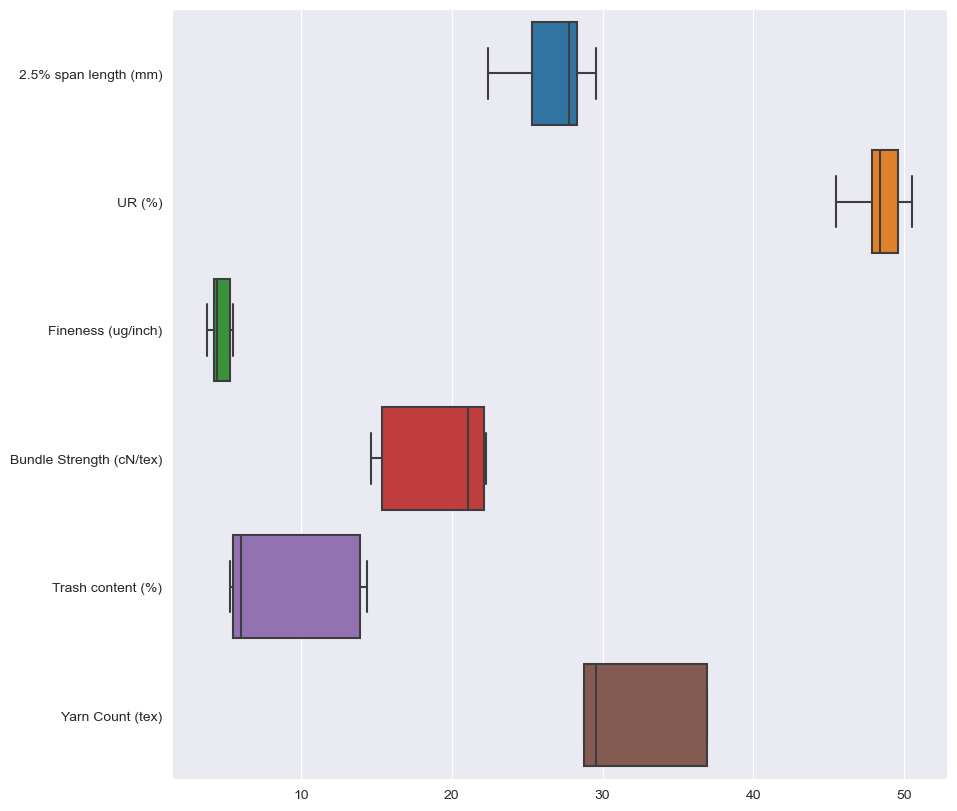

In [109]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,orient='h')

In [110]:

data.corr()

,2.5% span length (mm),UR (%),Fineness (ug/inch),Bundle Strength (cN/tex),Trash content (%),Yarn Count (tex)
2.5% span length (mm),1.000000,0.873845,-0.836474,0.928792,-0.928949,0.623695
UR (%),0.873845,1.000000,-0.734053,0.799854,-0.824903,0.537202
Fineness (ug/inch),-0.836474,-0.734053,1.000000,-0.907985,0.933666,-0.545374
Bundle Strength (cN/tex),0.928792,0.799854,-0.907985,1.000000,-0.983654,0.652219
Trash content (%),-0.928949,-0.824903,0.933666,-0.983654,1.000000,-0.605532
Yarn Count (tex),0.623695,0.537202,-0.545374,0.652219,-0.605532,1.000000


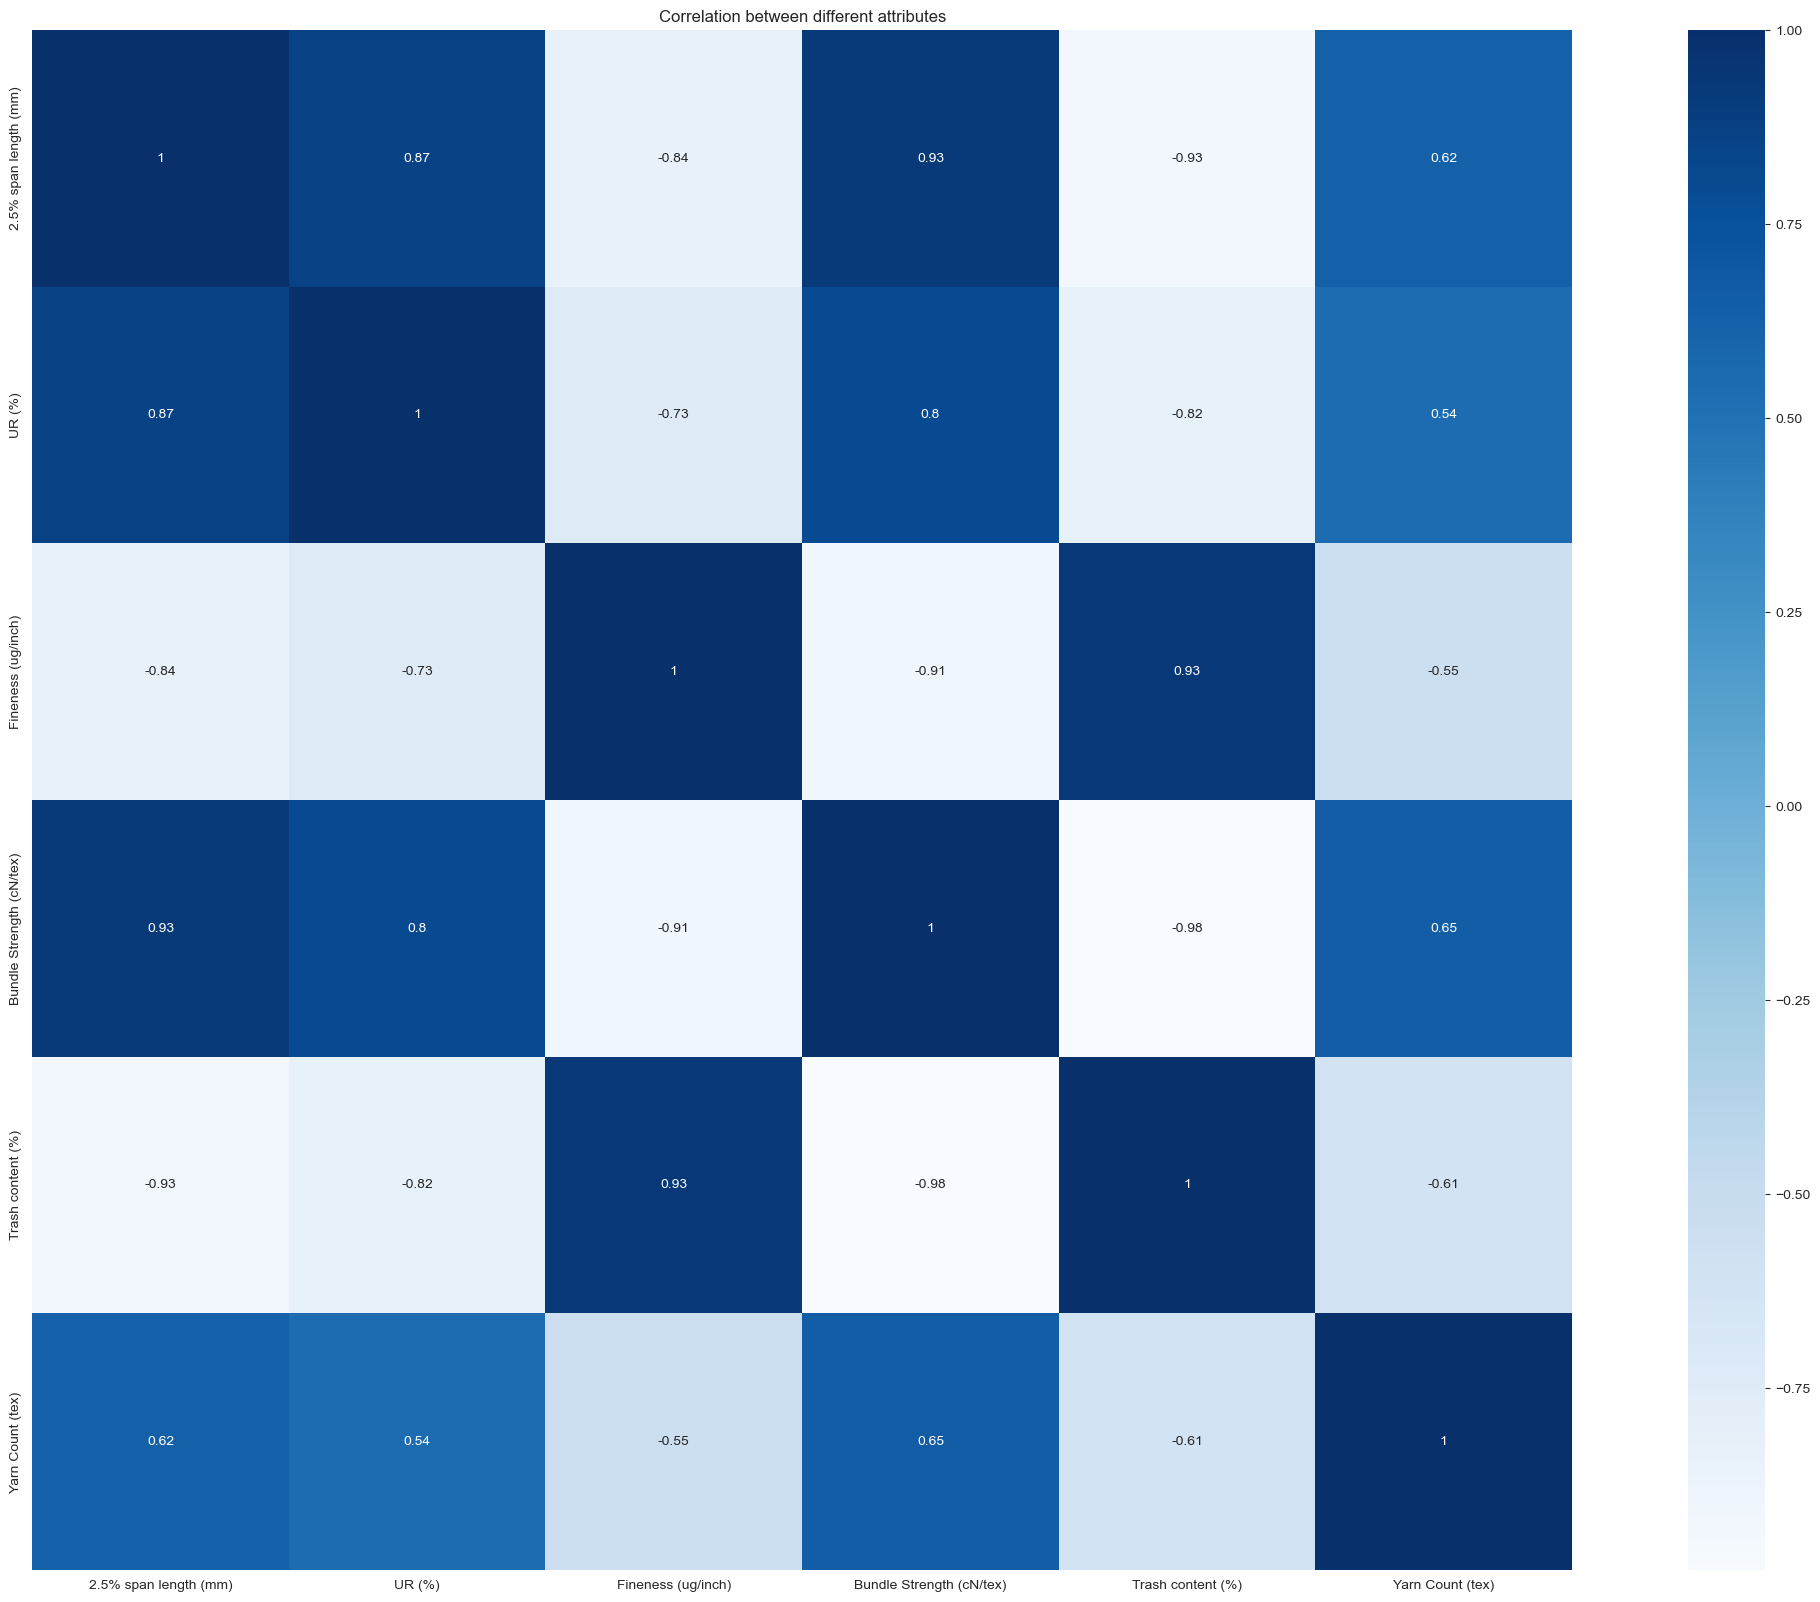

In [111]:
plt.figure(figsize=(30,20))
cor = data.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

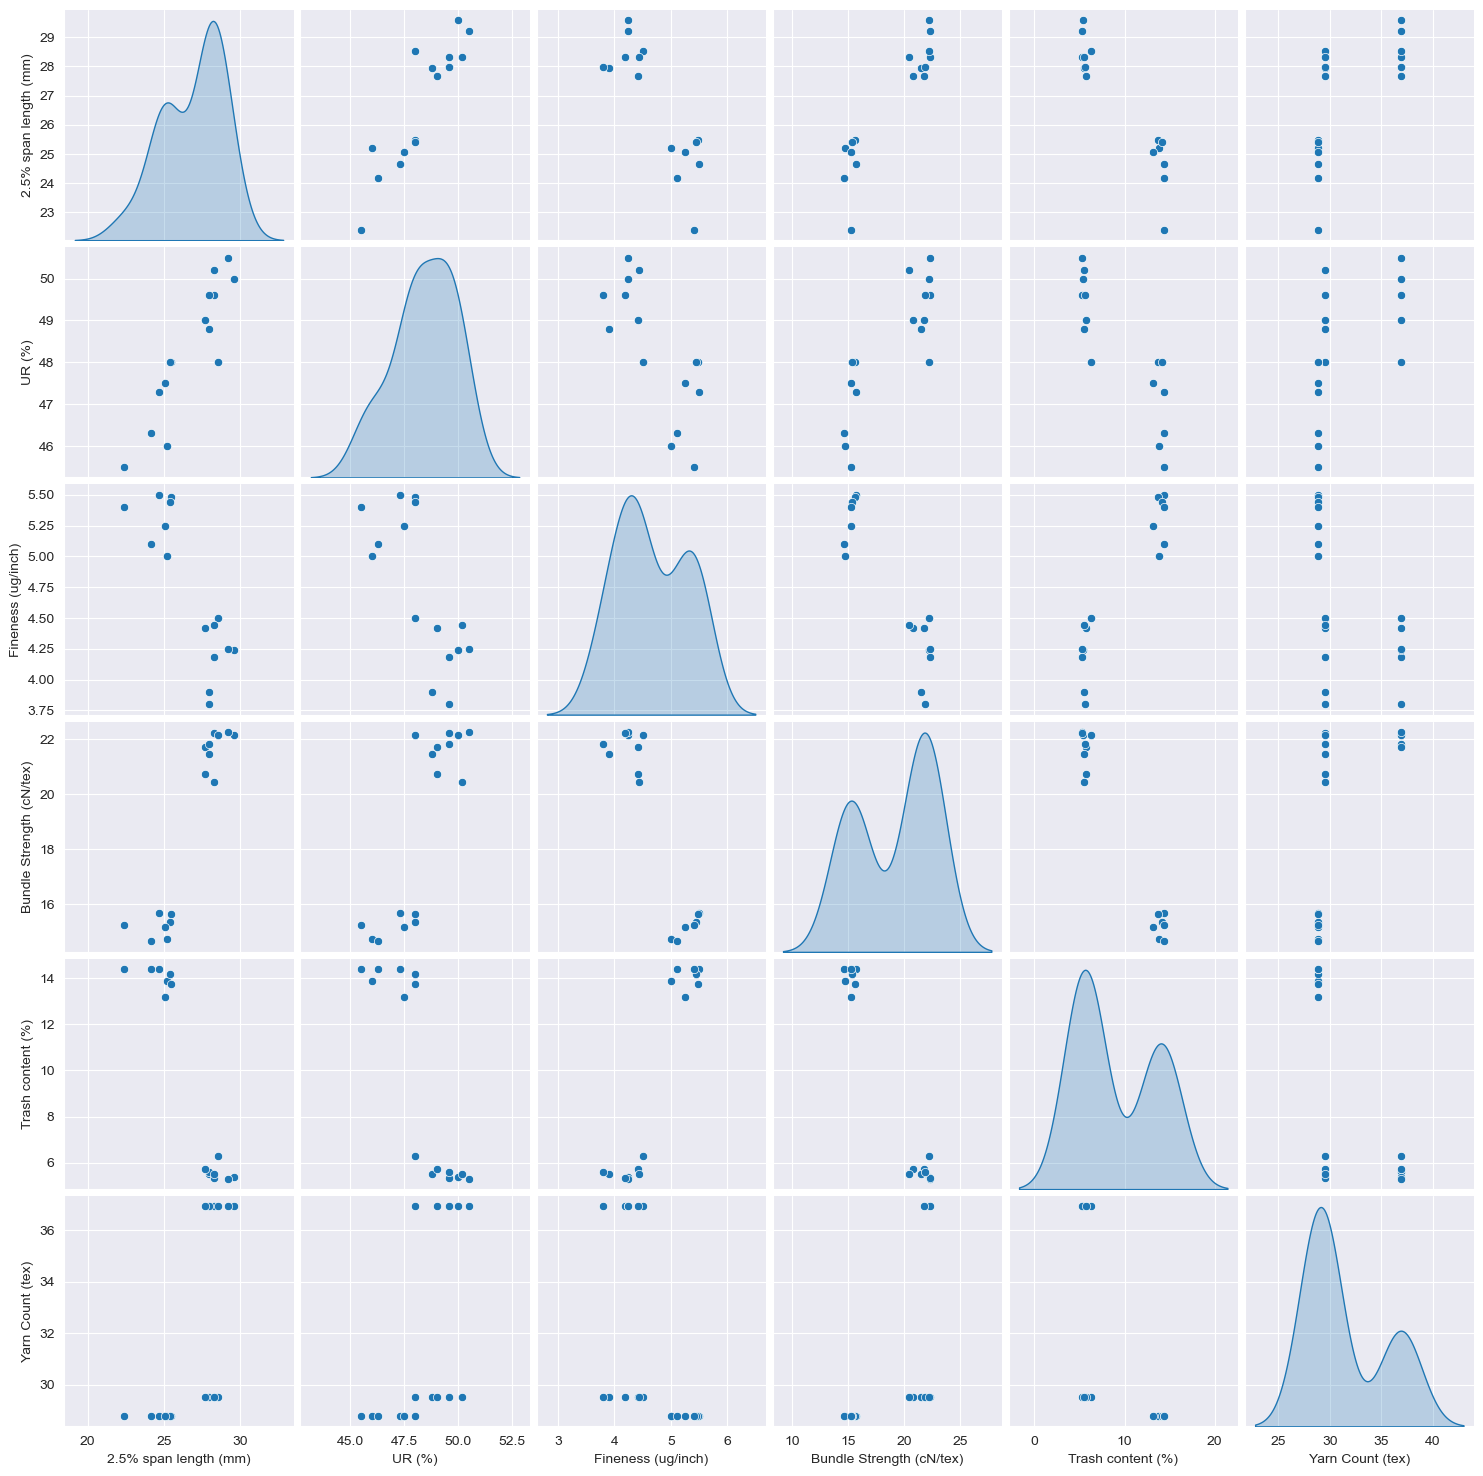

In [112]:
sns.pairplot(data,diag_kind='kde')


In [113]:
#Correlation with output variable
cor_target = abs(cor["Yarn Count (tex)"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

2.5% span length (mm)       0.623695
UR (%)                      0.537202
Fineness (ug/inch)          0.545374
Bundle Strength (cN/tex)    0.652219
Trash content (%)           0.605532
Yarn Count (tex)            1.000000
Name: Yarn Count (tex), dtype: float64

In [115]:
#Split the data into predictor variables and target variable, following by breaking them into train and test sets. 
from sklearn import preprocessing
from sklearn import utils

Y = data['Yarn Count (tex)'].values
X = data.drop('Yarn Count (tex)', axis=1).values

t=preprocessing.LabelEncoder()




X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

In [116]:
X_train, Y_train

(array([[24.17, 46.3 ,  5.1 , 14.65, 14.4 ],
        [28.32, 50.2 ,  4.44, 20.44,  5.52],
        [27.94, 48.8 ,  3.9 , 21.46,  5.48],
        [25.2 , 46.  ,  5.  , 14.72, 13.87],
        [27.98, 49.6 ,  3.8 , 21.84,  5.6 ],
        [28.53, 48.  ,  4.5 , 22.17,  6.3 ],
        [25.4 , 48.  ,  5.44, 15.36, 14.2 ],
        [29.58, 50.  ,  4.24, 22.17,  5.38],
        [27.98, 49.6 ,  3.8 , 21.84,  5.6 ],
        [28.32, 49.6 ,  4.18, 22.25,  5.32],
        [25.4 , 48.  ,  5.44, 15.36, 14.2 ],
        [29.2 , 50.5 ,  4.25, 22.27,  5.3 ],
        [25.48, 48.  ,  5.48, 15.63, 13.75],
        [28.53, 48.  ,  4.5 , 22.17,  6.3 ]]),
 array([28.8 , 29.53, 29.53, 28.8 , 36.91, 36.91, 28.8 , 36.91, 29.53,
        36.91, 28.8 , 36.91, 28.8 , 29.53]))

In [117]:

Y_train

array([28.8 , 29.53, 29.53, 28.8 , 36.91, 36.91, 28.8 , 36.91, 29.53,
       36.91, 28.8 , 36.91, 28.8 , 29.53])

In [55]:
# Testing Options
scoring = 'accuracy'

In [72]:
# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []


for name, model in models:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


For CART Model:Mean accuracy is nan (Std accuracy is nan)
For SVM Model:Mean accuracy is nan (Std accuracy is nan)
For NB Model:Mean accuracy is nan (Std accuracy is nan)
For KNN Model:Mean accuracy is nan (Std accuracy is nan)


C:\Users\RJOHARKA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\RJOHARKA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RJOHARKA\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\RJOHARKA\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 203, in fit
    check_classification_targets(y)
  File "C:\Users\RJOHARKA\Anaconda3\lib\site-packages\skle

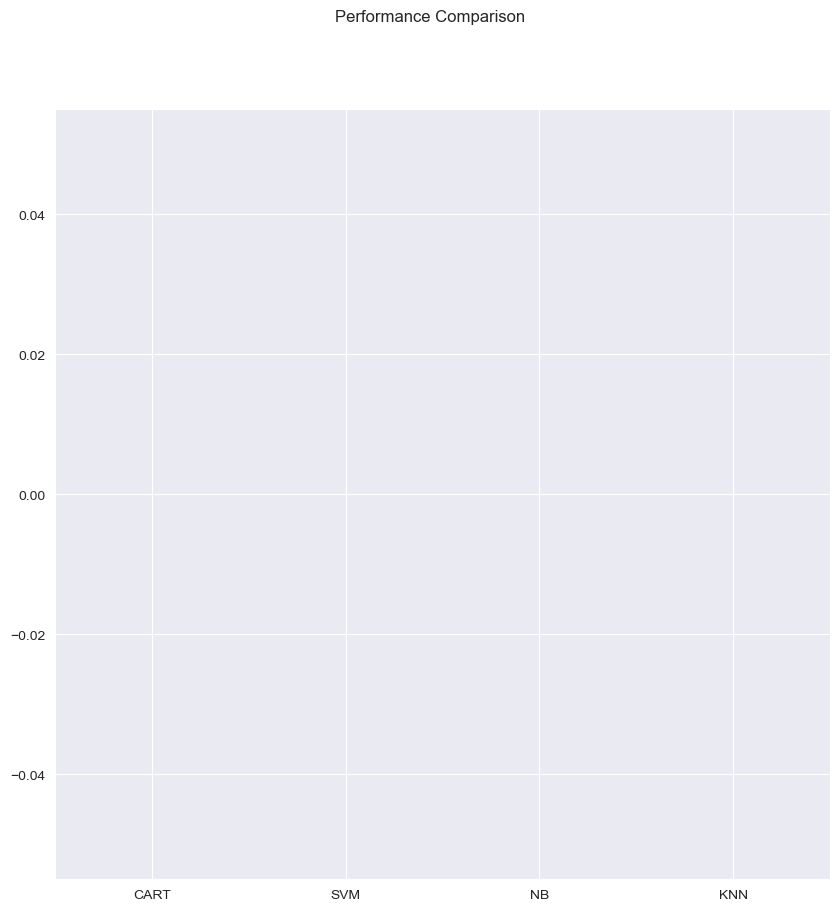

In [118]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [58]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))
    
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 


Model: CART
Accuracy score: 0.6666666666666666
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.50      0.50      0.50         2
           2       0.00      0.00      0.00         1

    accuracy                           0.67         6
   macro avg       0.50      0.50      0.50         6
weighted avg       0.67      0.67      0.67         6


Model: SVM
Accuracy score: 0.6666666666666666
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         2
           2       0.33      1.00      0.50         1

    accuracy                           0.67         6
   macro avg       0.44      0.67      0.50         6
weighted avg       0.56      0.67      0.58         6


Model: NB
Accuracy score: 0.6666666666666666
Classification report:
               precision  

C:\Users\RJOHARKA\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RJOHARKA\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RJOHARKA\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RJOHARKA\Anaconda3\lib\site-packages\

In [119]:
X_train, Y_train

(array([[24.17, 46.3 ,  5.1 , 14.65, 14.4 ],
        [28.32, 50.2 ,  4.44, 20.44,  5.52],
        [27.94, 48.8 ,  3.9 , 21.46,  5.48],
        [25.2 , 46.  ,  5.  , 14.72, 13.87],
        [27.98, 49.6 ,  3.8 , 21.84,  5.6 ],
        [28.53, 48.  ,  4.5 , 22.17,  6.3 ],
        [25.4 , 48.  ,  5.44, 15.36, 14.2 ],
        [29.58, 50.  ,  4.24, 22.17,  5.38],
        [27.98, 49.6 ,  3.8 , 21.84,  5.6 ],
        [28.32, 49.6 ,  4.18, 22.25,  5.32],
        [25.4 , 48.  ,  5.44, 15.36, 14.2 ],
        [29.2 , 50.5 ,  4.25, 22.27,  5.3 ],
        [25.48, 48.  ,  5.48, 15.63, 13.75],
        [28.53, 48.  ,  4.5 , 22.17,  6.3 ]]),
 array([28.8 , 29.53, 29.53, 28.8 , 36.91, 36.91, 28.8 , 36.91, 29.53,
        36.91, 28.8 , 36.91, 28.8 , 29.53]))

In [191]:
classifiers = [linear_model.LinearRegression()]

predictionData=np.array([28.53,46.3,5.1,14.65,14.4])

for item in classifiers:
    print(item)
    data = item
    data.fit(X_train, Y_train)
    print(data.predict(predictionData.reshape(1,-1)),'\n')


LinearRegression()
[35.99704197] 



In [201]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X,Y)

LinearRegression()

In [214]:
import pickle
data = {"model":regressor,"x":x}
with open('model.pkl', 'wb') as file:
    pickle.dump(data, file)
    
with open('model.pkl', 'rb') as file:
    data = pickle.load(file)


regressor_loaded.predict(X_train)


array([27.72714748, 30.75794873, 32.27331131, 27.46475404, 33.47309735,
       34.32679036, 29.67530596, 34.30175056, 33.47309735, 33.87508545,
       29.67530596, 34.44332183, 29.64801338, 34.32679036])

In [213]:
regressor_loaded = data["model"]
regressor_loaded.predict(X)

array([33.87508545, 33.47309735, 34.32679036, 34.30175056, 34.44332183,
       32.84663034, 32.27331131, 33.87508545, 33.47309735, 34.32679036,
       30.96822678, 30.75794873, 29.67530596, 30.08434178, 27.46475404,
       29.64801338, 29.67530596, 27.88535139, 27.72714748, 27.93864412])

In [206]:
regressor = data["model"]
regressor.predict([[28.32, 50.2 ,  4.44, 20.44,  5.52]])

array([30.75794873])

In [207]:
regressor.predict(X)

array([33.87508545, 33.47309735, 34.32679036, 34.30175056, 34.44332183,
       32.84663034, 32.27331131, 33.87508545, 33.47309735, 34.32679036,
       30.96822678, 30.75794873, 29.67530596, 30.08434178, 27.46475404,
       29.64801338, 29.67530596, 27.88535139, 27.72714748, 27.93864412])